Oncar Awwalu Rozaqy (18221068)

PENERAPAN DAN PERBANDINGAN ALGORITMA CONVOLUTIONAL NEURAL NETWORK DAN LONG SHORT-TERM MEMORY UNTUK DETEKSI INTERNET ADDICTION BERDASARKAN DATA ELECTROENCEPHALOGRAM (EEG) 

# EDA

In [597]:
# import os

# for s in range(1, 30):
#     if s >= 26:
#         continue
#     folder_path = f'S{s}'
#     for i in range(1, 12):
#         old_file_name = f'S{s}.task{i}.csv'
#         new_file_name = f'S{s}_task{i}.csv'
#         old_file_path = os.path.join(folder_path, old_file_name)
#         new_file_path = os.path.join(folder_path, new_file_name)
#         os.rename(old_file_path, new_file_path)

In [598]:
# s30_1 = pd.read_csv('S30/Autumyaeyeopen.csv', header=None)
# s30_1

In [599]:
# import os

# # List all files in the S30 folder
# folder_path = 'S30'
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# # Print the list of CSV files
# print(csv_files)

In [600]:
# import os

# # Folder yang berisi file CSV
# folder_path = "S30"

# # List nama file asli dan mapping ke task
# file_mapping = {
#     "Autumyeyeclose.csv": "task1",
#     "Autumyaeyeopen.csv": "task2",
#     "Autumyhappy.csv": "task3",
#     "Autumycalm.csv": "task4",
#     "Autumysad.csv": "task5",
#     "Autumyfear.csv": "task6",
#     "Autumymomorise.csv": "task7",
#     "Autumyexcutive.csv": "task8",
#     "Autumyrecall.csv": "task9",
#     "Autumyeyecloseextend.csv": "task10",
#     "Autumyeyeopenextend.csv": "task11",
# }

# # Loop untuk mengganti nama file
# for original_name, task_name in file_mapping.items():
#     original_path = os.path.join(folder_path, original_name)
#     new_name = f"S30_{task_name}.csv"
#     new_path = os.path.join(folder_path, new_name)

#     # Rename file jika file asli ada di folder
#     if os.path.exists(original_path):
#         os.rename(original_path, new_path)
#         print(f"Renamed: {original_name} -> {new_name}")
#     else:
#         print(f"File not found: {original_name}")

In [601]:
# # Read S30
# s30 = pd.read_csv('Data/S30/S30_task1.csv', header=None)
# s30.head()

In [602]:
# Read data

import pandas as pd
import numpy as np

dataframes = {}
for i in range(1, 30):
    for j in range(1, 12):
        df_name = f's{i}_task{j}'
        file_path = f'Data/S{i}/S{i}_task{j}.csv'
        df = pd.read_csv(file_path, header=None)
        df.columns = ['attention', 'meditation', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'Delta', 'Theta', 'LowGamma', 'MiddleGamma']
        df['subject'] = f'Subject_{i}'
        df['task'] = f'Task_{j}'
        dataframes[df_name] = df

# Case khusus S30
for j in range(1, 12):
    df_name = f's30_task{j}'
    file_path = f'Data/S30/S30_task{j}.csv'
    df = pd.read_csv(file_path, header=None)
    df.columns = ['attention', 'meditation', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'Delta', 'Theta', 'LowGamma', 'MiddleGamma']
    df['subject'] = 'Subject_30'
    df['task'] = f'Task_{j}'
    dataframes[df_name] = df
    
del df
    
# Access spesifik dataframe
dataframes['s29_task3'].head()

,attention,meditation,LowAlpha,HighAlpha,LowBeta,HighBeta,Delta,Theta,LowGamma,MiddleGamma,subject,task
0,67,50,4047,19138,7473,14886,1128023,262994,16422,4942,Subject_29,Task_3
1,63,54,41038,13512,14093,5535,68169,19879,10488,3750,Subject_29,Task_3
2,63,63,2652,28545,7422,4042,8082,42172,4563,2647,Subject_29,Task_3
3,61,57,17462,15195,17460,11338,112203,32372,10070,2108,Subject_29,Task_3
4,70,74,6270,22482,20727,13066,32444,33533,10554,6033,Subject_29,Task_3


In [603]:
# Gabungkan semua dataframes menjadi satu dataframe, namun berikan label subjek dan task
df_all = pd.concat(dataframes, ignore_index=True)
df_all

,attention,meditation,LowAlpha,HighAlpha,LowBeta,HighBeta,Delta,Theta,LowGamma,MiddleGamma,subject,task
0,34,69,25137,10967,2604,5321,25031,37279,1725,2549,Subject_1,Task_1
1,43,74,15167,34062,17446,16113,49284,52473,31642,7755,Subject_1,Task_1
2,61,64,5726,4932,2482,6996,139747,18902,7644,3362,Subject_1,Task_1
3,57,64,24948,14535,30571,15185,228001,124834,13174,7611,Subject_1,Task_1
4,66,57,5626,6658,6843,4939,260240,23033,3564,3302,Subject_1,Task_1
...,...,...,...,...,...,...,...,...,...,...,...,...
21595,26,63,24998,29562,6777,2677,169120,43877,946,674,Subject_30,Task_11
21596,43,64,22672,27618,3500,5946,208455,7015,2757,1565,Subject_30,Task_11
21597,44,83,81951,94905,39206,22496,103254,108990,24667,4548,Subject_30,Task_11
21598,37,93,27860,212231,18418,13025,78108,55754,4578,3073,Subject_30,Task_11


In [604]:
# Count null value dari setiap atribut df_all
df_all.isnull().sum()


attention      0
meditation     0
LowAlpha       0
HighAlpha      0
LowBeta        0
HighBeta       0
Delta          0
Theta          0
LowGamma       0
MiddleGamma    0
subject        0
task           0
dtype: int64

In [605]:
df_all[(df_all['subject'] == 'Subject_30') | (df_all['subject'] == 'Subject_1')]

,attention,meditation,LowAlpha,HighAlpha,LowBeta,HighBeta,Delta,Theta,LowGamma,MiddleGamma,subject,task
0,34,69,25137,10967,2604,5321,25031,37279,1725,2549,Subject_1,Task_1
1,43,74,15167,34062,17446,16113,49284,52473,31642,7755,Subject_1,Task_1
2,61,64,5726,4932,2482,6996,139747,18902,7644,3362,Subject_1,Task_1
3,57,64,24948,14535,30571,15185,228001,124834,13174,7611,Subject_1,Task_1
4,66,57,5626,6658,6843,4939,260240,23033,3564,3302,Subject_1,Task_1
...,...,...,...,...,...,...,...,...,...,...,...,...
21595,26,63,24998,29562,6777,2677,169120,43877,946,674,Subject_30,Task_11
21596,43,64,22672,27618,3500,5946,208455,7015,2757,1565,Subject_30,Task_11
21597,44,83,81951,94905,39206,22496,103254,108990,24667,4548,Subject_30,Task_11
21598,37,93,27860,212231,18418,13025,78108,55754,4578,3073,Subject_30,Task_11


          attention    meditation       LowAlpha     HighAlpha       LowBeta  \
count  21600.000000  21600.000000   21600.000000  2.160000e+04  2.160000e+04   
mean      51.431296     53.828565   29453.303611  2.898642e+04  1.651725e+04   
std       22.144398     19.447170   49267.403781  4.930982e+04  2.532293e+04   
min        1.000000      1.000000       0.000000  1.000000e+00  0.000000e+00   
25%       37.000000     41.000000    6878.500000  7.456750e+03  6.093750e+03   
50%       51.000000     53.000000   14987.500000  1.502200e+04  1.109000e+04   
75%       67.000000     66.000000   31818.000000  3.064925e+04  1.931600e+04   
max      100.000000    100.000000  911778.000000  1.088949e+06  1.578578e+06   

           HighBeta         Delta         Theta      LowGamma   MiddleGamma  
count  2.160000e+04  2.160000e+04  2.160000e+04  2.160000e+04  2.160000e+04  
mean   1.948166e+04  3.481039e+05  9.918609e+04  1.282579e+04  4.225191e+04  
std    3.715347e+04  5.085053e+05  1.875563e+

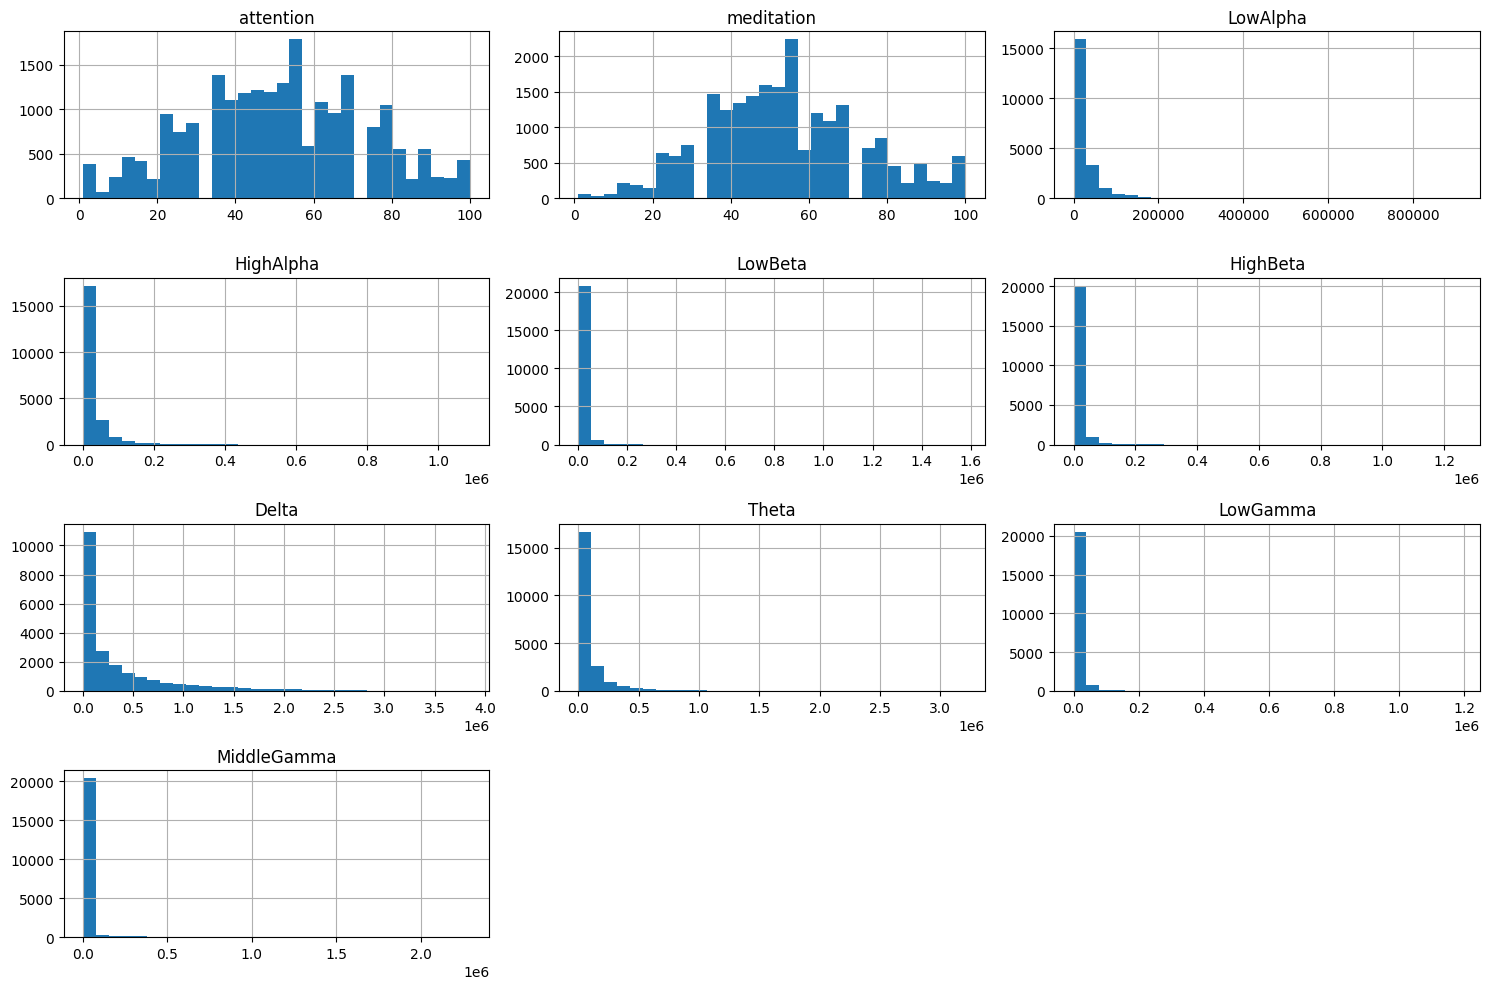

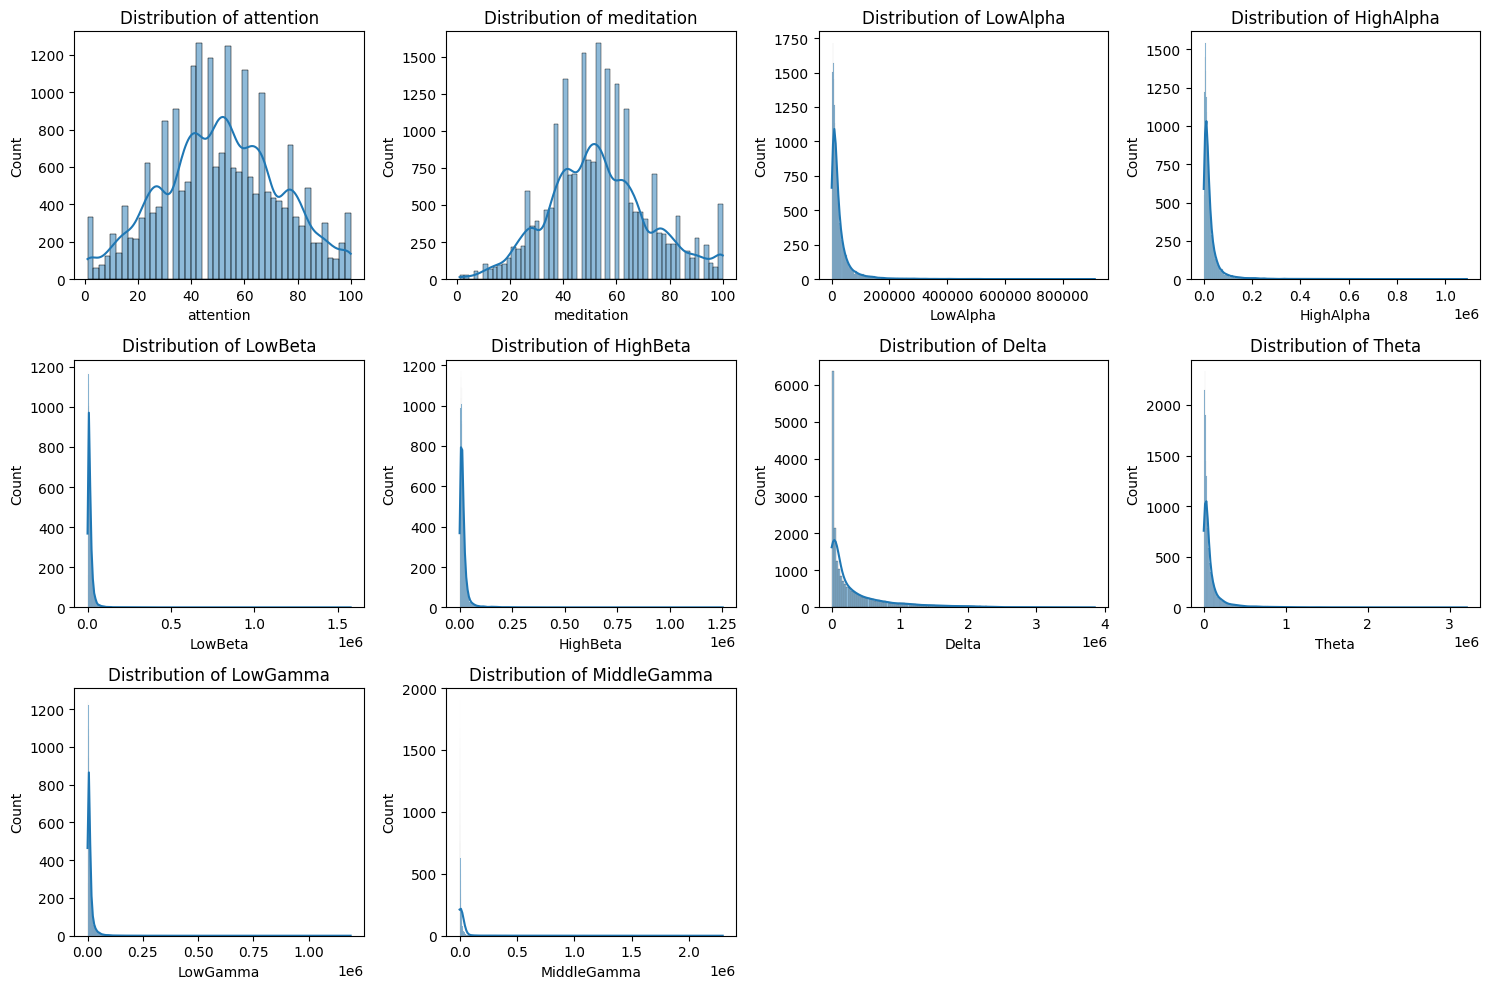

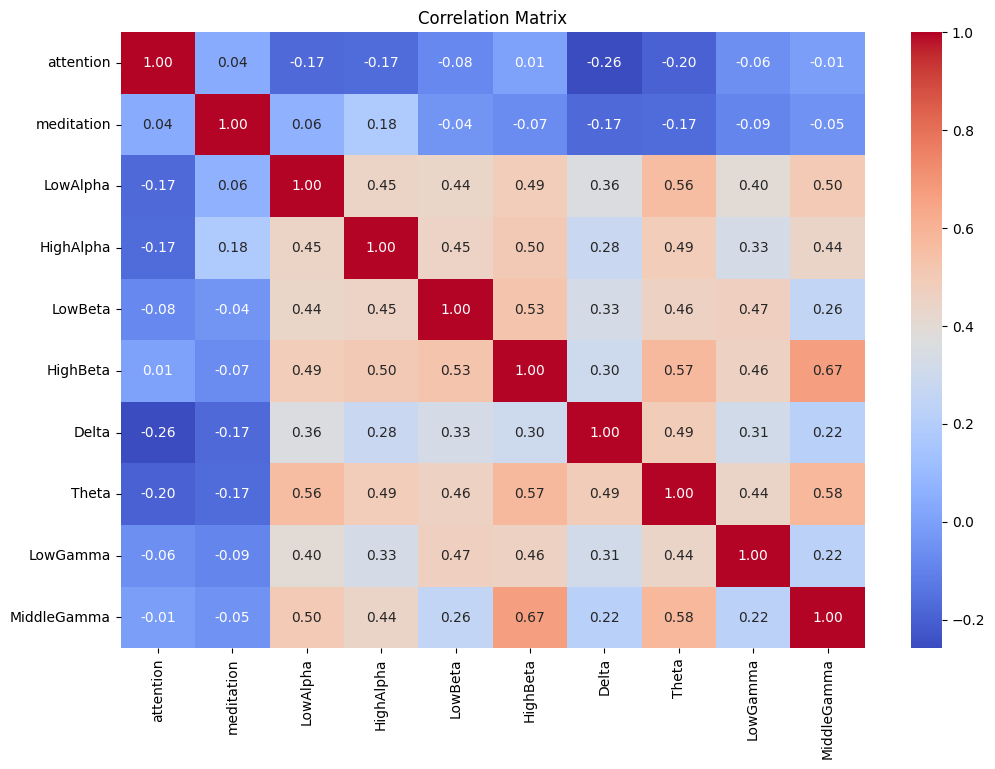

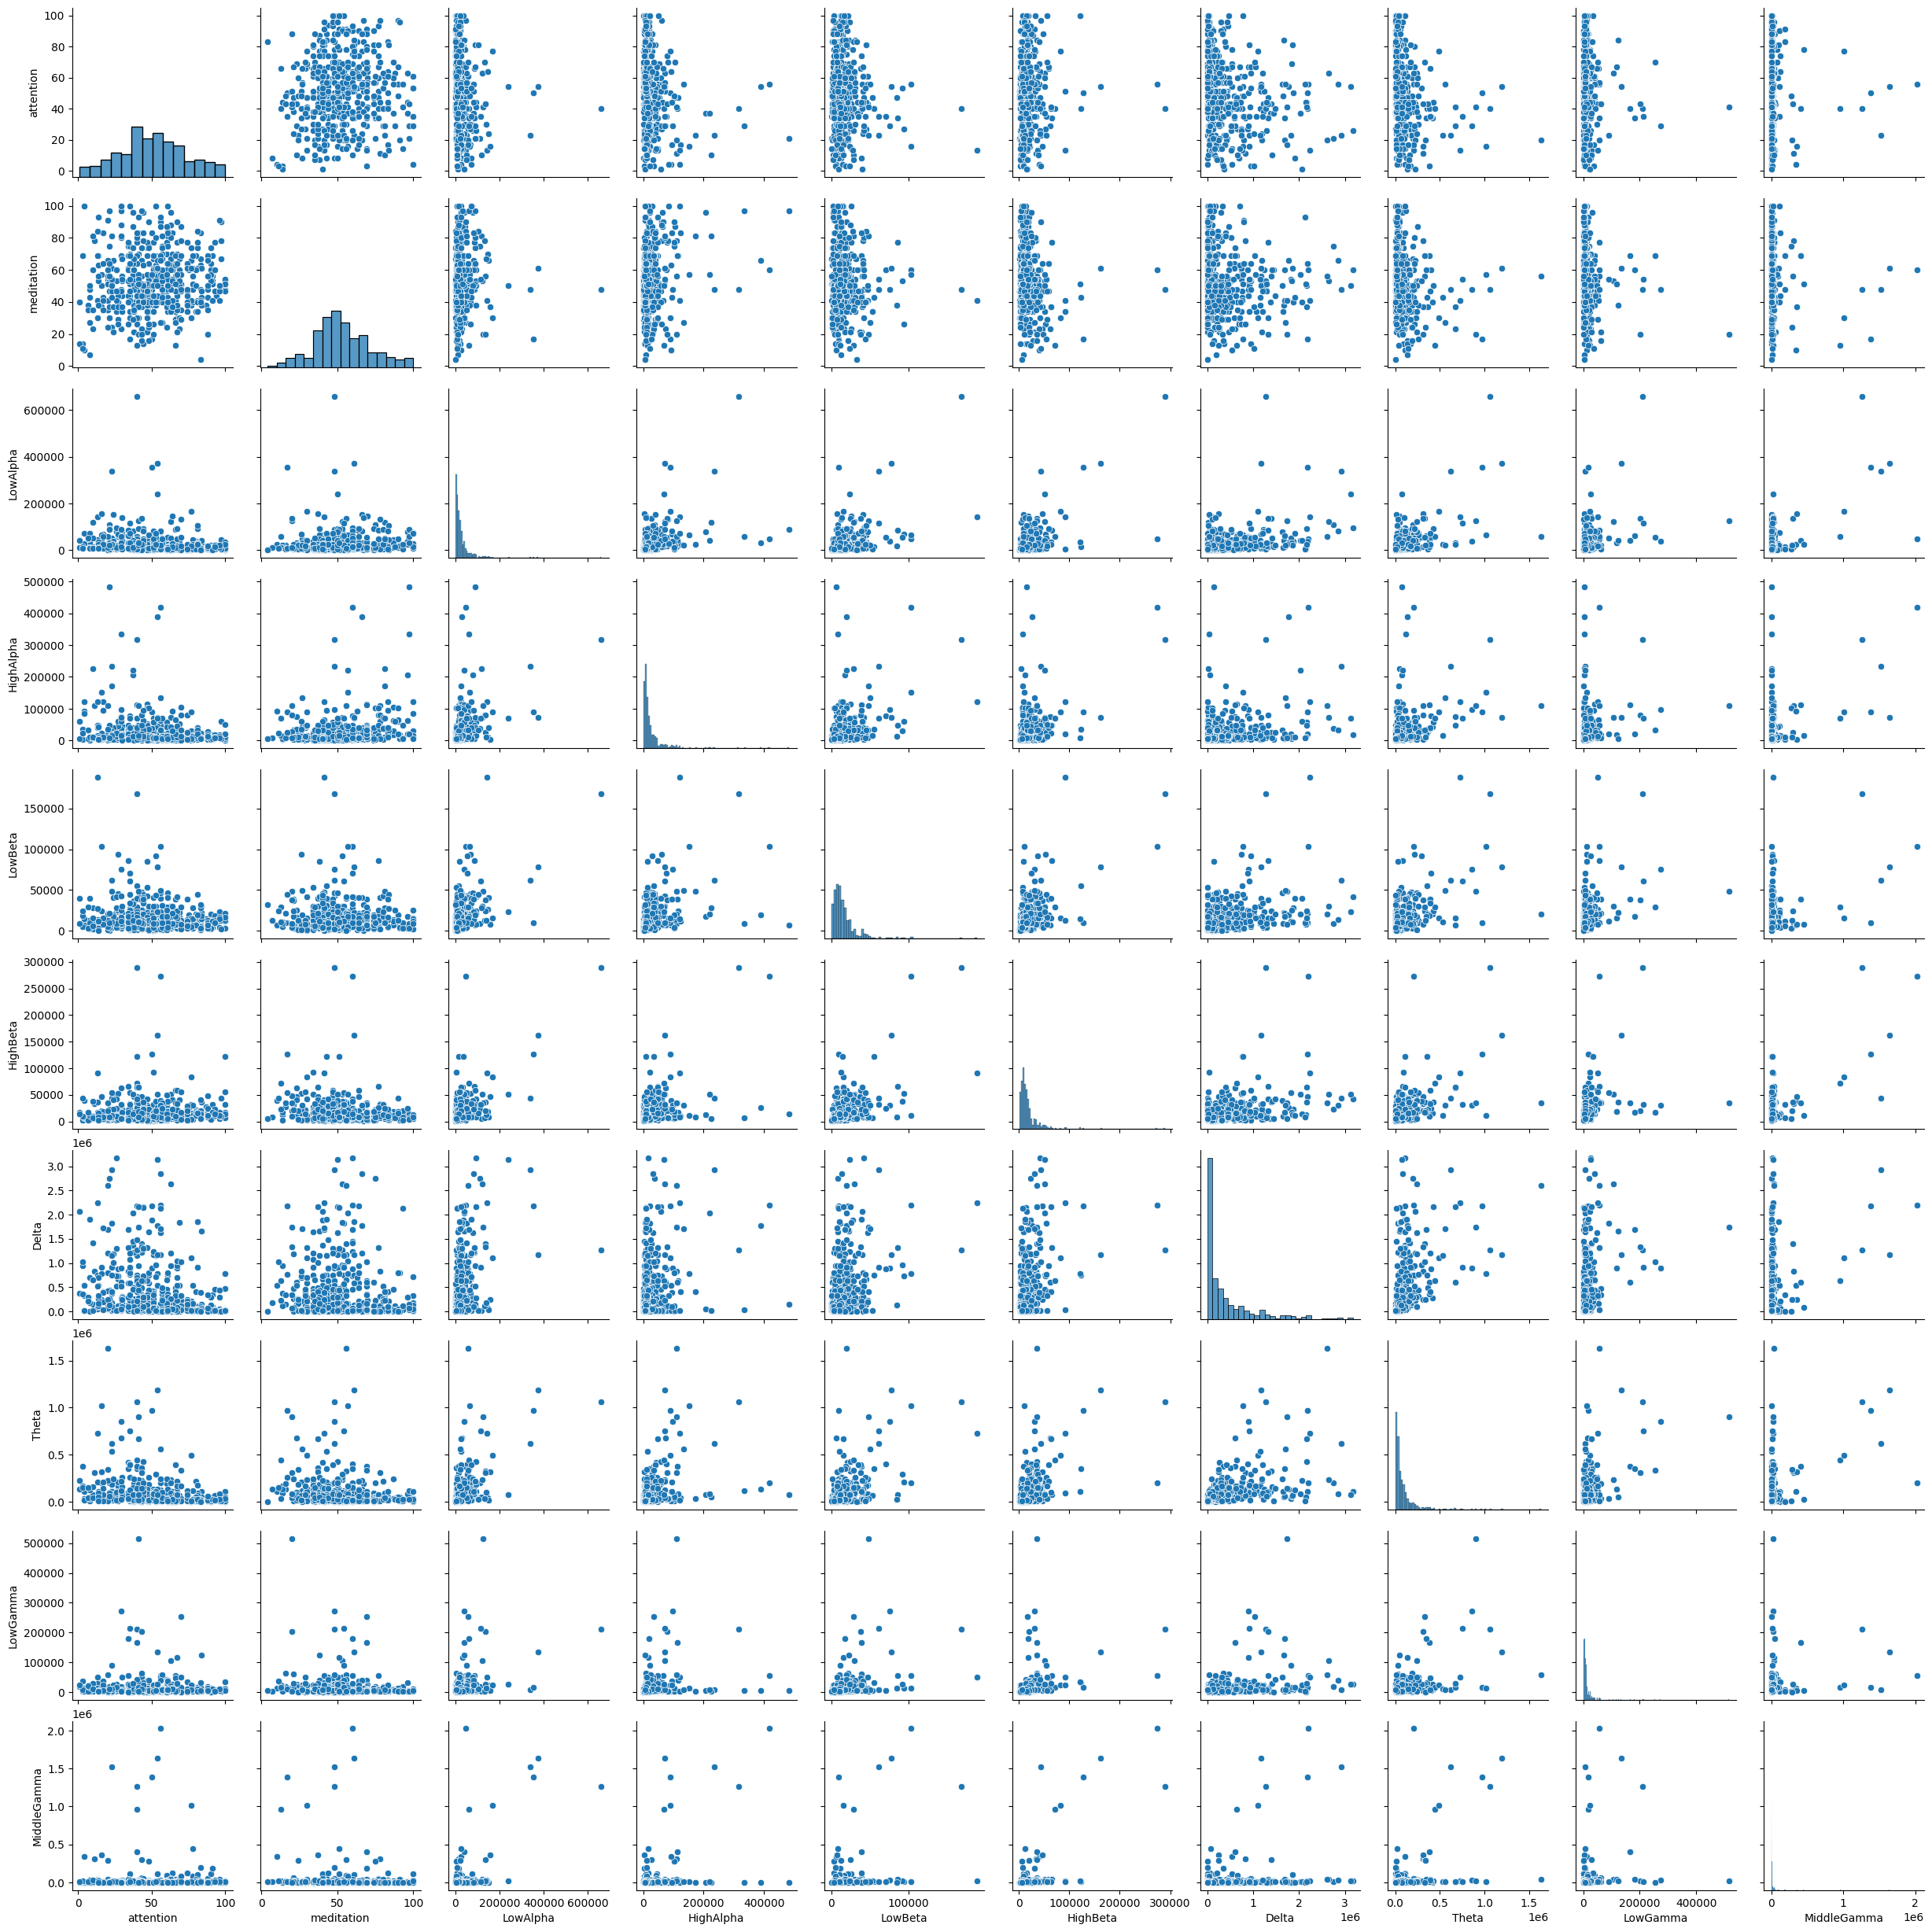

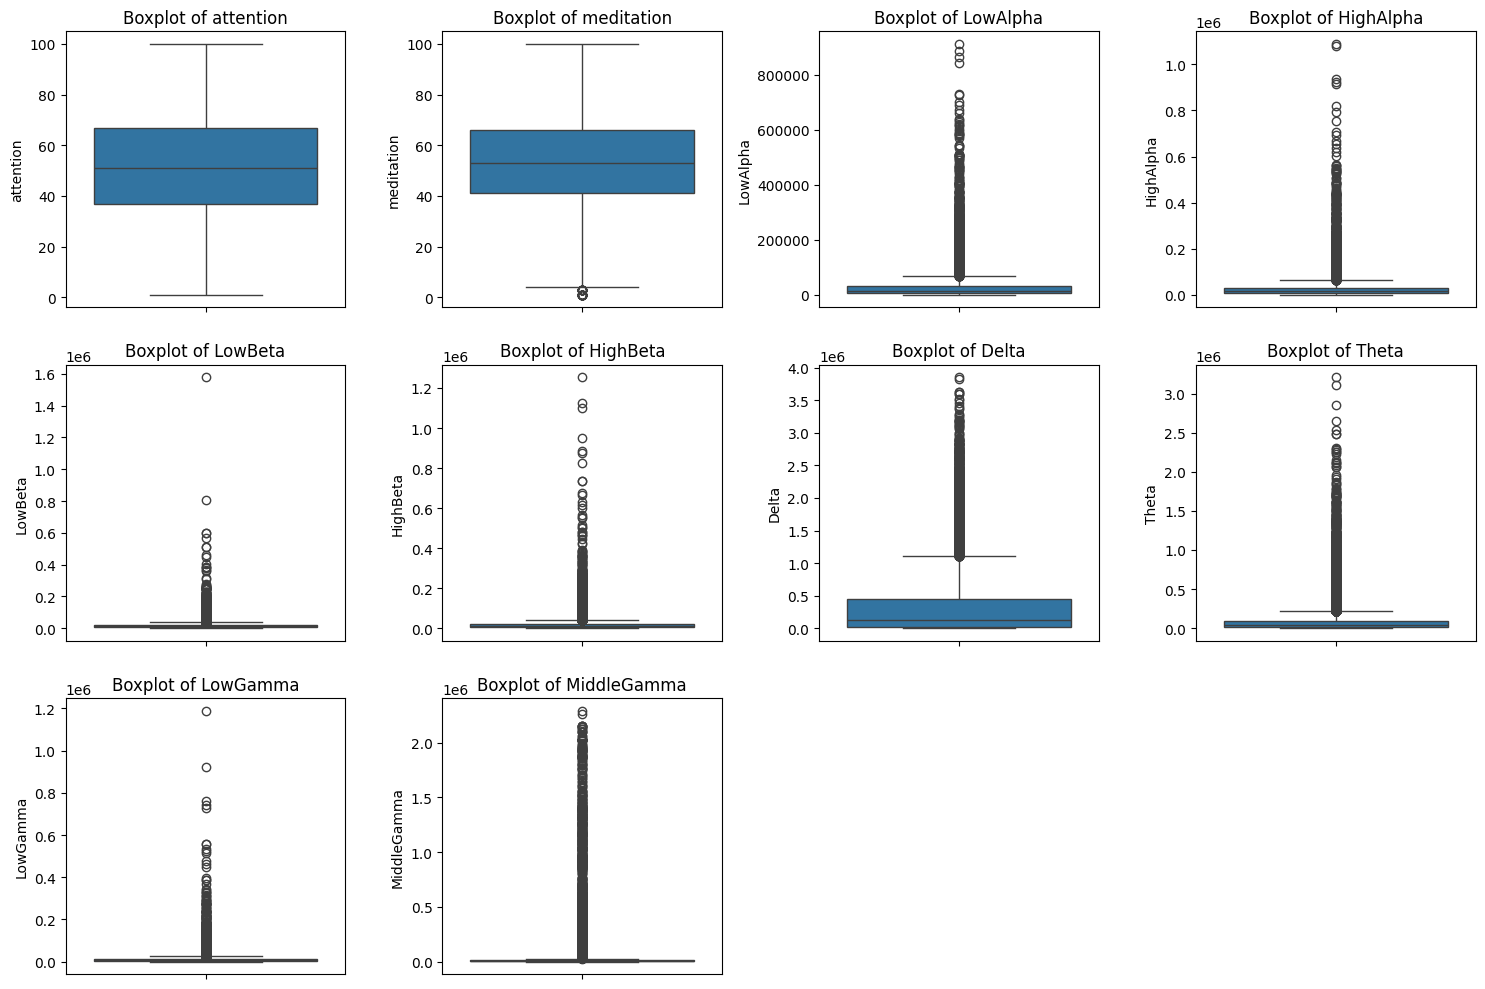

               count           mean            std   min       25%       50%  \
attention    21600.0      51.431296      22.144398   1.0     37.00      51.0   
meditation   21600.0      53.828565      19.447170   1.0     41.00      53.0   
LowAlpha     21600.0   29453.303611   49267.403781   0.0   6878.50   14987.5   
HighAlpha    21600.0   28986.419537   49309.824927   1.0   7456.75   15022.0   
LowBeta      21600.0   16517.245231   25322.925347   0.0   6093.75   11090.0   
HighBeta     21600.0   19481.664537   37153.468871   1.0   6843.25   11753.0   
Delta        21600.0  348103.904722  508505.289449  15.0  23200.75  123674.5   
Theta        21600.0   99186.087454  187556.335948   0.0  17439.25   39017.0   
LowGamma     21600.0   12825.794676   26442.630035   0.0   3897.75    7089.5   
MiddleGamma  21600.0   42251.907778  187656.383261   0.0   2682.00    5735.0   

                   75%        max  
attention        67.00      100.0  
meditation       66.00      100.0  
LowAlpha   

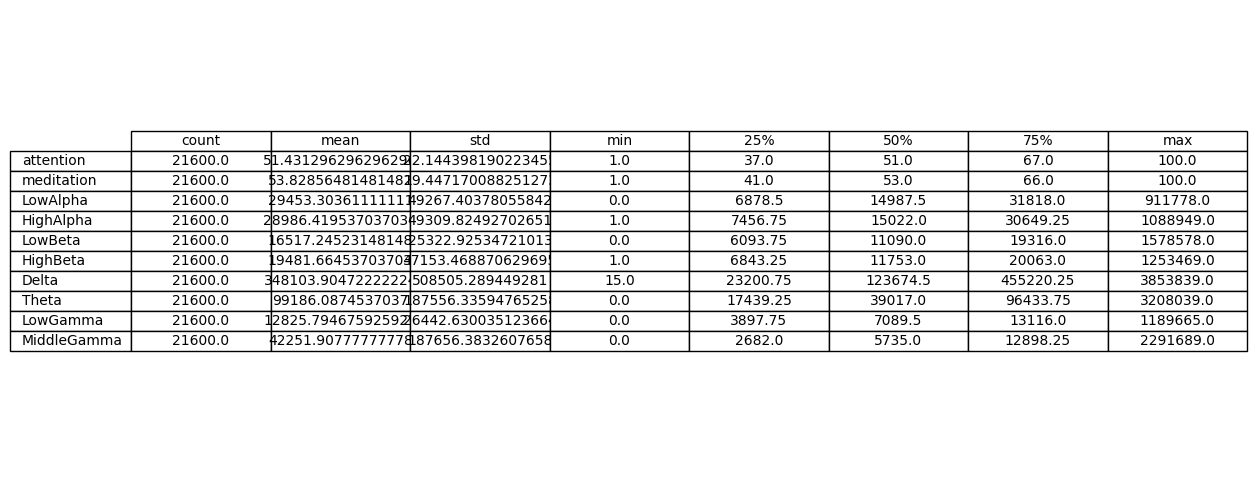

In [606]:
import seaborn as sns

import matplotlib.pyplot as plt

df_processed = df_all.drop(columns=['subject', 'task'])

# Deskripsi statistik
print(df_processed.describe())

# Visualisasi distribusi untuk setiap kolom
df_processed.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualisasi distribusi menggunakan seaborn
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_processed.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_processed[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(df_processed.sample(500))  # Menggunakan sampel untuk mempercepat proses
plt.show()

# Boxplot untuk melihat distribusi dan outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_processed.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_processed[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Deskripsi statistik dalam bentuk tabel
desc_table = df_processed.describe().transpose()
print(desc_table)

# Simpan deskripsi statistik sebagai gambar
plt.figure(figsize=(12, 6))
plt.axis('off')
tbl = plt.table(cellText=desc_table.values, colLabels=desc_table.columns, rowLabels=desc_table.index, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.savefig('deskripsi_statistik.png', bbox_inches='tight', dpi=300)
plt.show()

In [607]:
# Read resultcombine.xlsx)
result = pd.read_excel('Data/ResultCombine.xlsx', sheet_name='Sheet1')
result['Internet Addiction Result'].value_counts()

Internet Addiction Result
Mid Level         18
Moderate level     7
Normal Level       4
Severe Level       1
Name: count, dtype: int64

# Preprocessing

In [608]:
# Check row x columns each csv files
for i in range(1, 31):
    for j in range(1, 12):
        df_name = f's{i}_task{j}'
        file_path = f'Data/S{i}/S{i}_task{j}.csv'
        df = pd.read_csv(file_path, header=None)
        print(f'{df_name}: {df.shape[0]} rows, {df.shape[1]} columns')

s1_task1: 60 rows, 10 columns
s1_task2: 60 rows, 10 columns
s1_task3: 60 rows, 10 columns
s1_task4: 60 rows, 10 columns
s1_task5: 60 rows, 10 columns
s1_task6: 60 rows, 10 columns
s1_task7: 60 rows, 10 columns
s1_task8: 120 rows, 10 columns
s1_task9: 60 rows, 10 columns
s1_task10: 60 rows, 10 columns
s1_task11: 60 rows, 10 columns
s2_task1: 60 rows, 10 columns
s2_task2: 60 rows, 10 columns
s2_task3: 60 rows, 10 columns
s2_task4: 60 rows, 10 columns
s2_task5: 60 rows, 10 columns
s2_task6: 60 rows, 10 columns
s2_task7: 60 rows, 10 columns
s2_task8: 120 rows, 10 columns
s2_task9: 60 rows, 10 columns
s2_task10: 60 rows, 10 columns
s2_task11: 60 rows, 10 columns
s3_task1: 60 rows, 10 columns
s3_task2: 60 rows, 10 columns
s3_task3: 60 rows, 10 columns
s3_task4: 60 rows, 10 columns
s3_task5: 60 rows, 10 columns
s3_task6: 60 rows, 10 columns
s3_task7: 60 rows, 10 columns
s3_task8: 120 rows, 10 columns
s3_task9: 60 rows, 10 columns
s3_task10: 60 rows, 10 columns
s3_task11: 60 rows, 10 columns
s

In [609]:
# Data cleaning untuk S30 agar konsisten dengan data lainnya

import os
import pandas as pd

folder_path = "Data/S30"

# Iterasi melalui setiap file task untuk subject 30
for j in range(1, 12):
    file_name = f"S30_task{j}.csv"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, header=None)

        # Hapus kolom 0-2
        if df.shape[1] == 10:
            continue
        df = df.drop(columns=[0, 1, 2])
        
        # Sesuaikan jumlah baris
        if "task8" in file_name:
            df = df.head(120)
        else:
            df = df.head(60)
        
        # Simpan kembali file CSV 
        df.to_csv(file_path, index=False, header=False)
        print(f"{file_name} berhasil diperbarui dengan ukuran: {df.shape}")
    else:
        print(f"File tidak ditemukan: {file_name}")

In [610]:
# Data Augmentation
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Config
data_dir = "Data"  
label_path = "Data/ResultCombine.xlsx"
window_size = 50
step_size = 2

# Label Mapping
label_df = pd.read_excel(label_path)
label_map = label_df.set_index("Subject")["Internet Addiction Result"].to_dict()
label_map = {k: v.replace('Severe Level', 'High').replace('Moderate level', 'High').replace('Mid Level', 'Medium').replace('Normal Level', 'Normal') for k, v in label_map.items()} # change label with low sample
le = LabelEncoder()
encoded_labels = le.fit_transform(list(label_map.values()))
encoded_label_map = dict(zip(label_map.keys(), encoded_labels))

# Preprocessing
def process_subject(subject_dir, subject_id):
    X, y = [], []
    label = encoded_label_map.get(subject_id)
    if label is None:
        return X, y

    for file in sorted(os.listdir(subject_dir)):
        if not file.endswith(".csv"):
            continue
        df = pd.read_csv(os.path.join(subject_dir, file), header=None)
        data = df.values
        for start in range(0, data.shape[0] - window_size + 1, step_size):
            window = data[start:start + window_size]
            X.append(window)
            y.append(label)
    return X, y

# Proses Semua Subjek
X_all, y_all = [], []
for subject_folder in sorted(os.listdir(data_dir)):
    subject_dir = os.path.join(data_dir, subject_folder)
    X, y = process_subject(subject_dir, subject_folder)
    X_all.extend(X)
    y_all.extend(y)

# Konversi ke array numpy
X_array = np.array(X_all)  # Shape: (N, window_size, 10)
y_array = np.array(y_all)  # Shape: (N,)

print("X shape:", X_array.shape)
print("y shape:", y_array.shape)
print("Label distribution:", np.unique(y_array, return_counts=True))


X shape: (2880, 50, 10)
y shape: (2880,)
Label distribution: (array([0, 1, 2]), array([ 768, 1728,  384]))


# Modelling

In [611]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D, MaxPool1D, Flatten, Dense, Dropout, LSTM, Input, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalFocalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

## CNN

In [612]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42, stratify=y_array)

# One-hot encode labels
num_classes = len(np.unique(y_array))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Reshape input for CNN
X_train_cnn = X_train  # shape (num_samples, window_size, 10)
X_test_cnn = X_test

In [613]:
# CNN Model
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(16, 3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool1D(2),
        Dropout(0.4),
        Conv1D(32, 3, activation='relu', padding='same'),
        GlobalAveragePooling1D(),  # Reduces overfitting vs Flatten
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=CategoricalFocalCrossentropy(gamma=2.0),
        metrics=['accuracy']
    )
    return model

def build_cnn_model_v2(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, 3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool1D(2),
        Dropout(0.3),

        Conv1D(64, 3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool1D(2),
        Dropout(0.4),

        Conv1D(128, 3, activation='relu', padding='same'),
        BatchNormalization(),
        GlobalAveragePooling1D(),

        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=CategoricalFocalCrossentropy(gamma=2.0),
        metrics=['accuracy']
    )
    return model


In [614]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-5)

# Build model versi 2
cnn_model = build_cnn_model_v2((50, 10), num_classes)

# Hitung class weights pada data resampled
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Train model
cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=200,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
)

Epoch 1/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2771 - loss: 0.2711 - val_accuracy: 0.3839 - val_loss: 0.2405 - learning_rate: 1.0000e-04
Epoch 2/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3813 - loss: 0.2492 - val_accuracy: 0.4078 - val_loss: 0.2387 - learning_rate: 1.0000e-04
Epoch 3/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4104 - loss: 0.2372 - val_accuracy: 0.4577 - val_loss: 0.2256 - learning_rate: 1.0000e-04
Epoch 4/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4349 - loss: 0.2323 - val_accuracy: 0.4859 - val_loss: 0.2194 - learning_rate: 1.0000e-04
Epoch 5/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4848 - loss: 0.2220 - val_accuracy: 0.5098 - val_loss: 0.2100 - learning_rate: 1.0000e-04
Epoch 6/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4761 - loss: 0.2140 - val_accuracy: 0.4946 - val_loss: 0.2155 - learning_rate: 1.0000e-04
Epoch 7/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
              precision    recall  f1-score   support

           0     0.6928    0.7516    0.7210       153
           1     0.9063    0.8671    0.8863       346
           2     0.7342    0.7532    0.7436        77

    accuracy                         0.8212       576
   macro avg     0.7778    0.7906    0.7836       576
weighted avg     0.8266    0.8212    0.8233       576



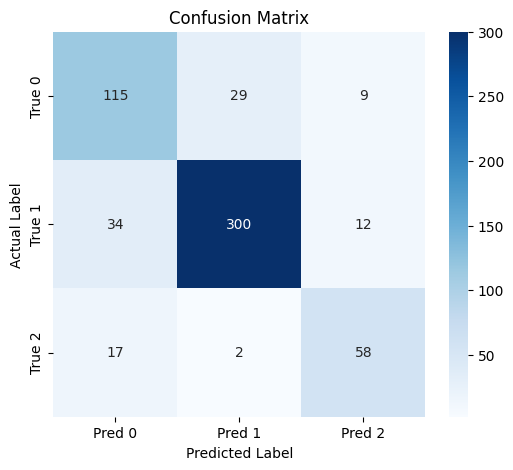

In [615]:
# Predict 
y_pred_prob = cnn_model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test

# Classification Report 
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix 
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix 
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(num_classes)],
            yticklabels=[f'True {i}' for i in range(num_classes)])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

## LSTM

In [616]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42, stratify=y_array)

# One-hot encode labels
num_classes = len(np.unique(y_array))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Reshape input for lstm
X_train_lstm = X_train  # shape (num_samples, window_size, 10)
X_test_lstm = X_test

In [626]:
# LSTM Model
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=CategoricalFocalCrossentropy(gamma=2.0),
        metrics=['accuracy']
    )
    return model

def build_lstm_model_v2(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(32),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=CategoricalFocalCrossentropy(gamma=2.0),
        metrics=['accuracy']
    )
    return model

# Build and train LSTM model with optimized architecture
def build_lstm_model_v3(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64, return_sequences=True, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=CategoricalFocalCrossentropy(gamma=2.0),
        metrics=['accuracy']
    )
    return model

In [630]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-5)

# Build model
lstm_model = build_lstm_model_v3((50, 10), num_classes)

# Hitung class weights pada data resampled
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Train model
lstm_model.fit(
    X_train_lstm, y_train_cat,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    # class_weight=class_weight_dict,
)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3811 - loss: 0.1846 - val_accuracy: 0.5597 - val_loss: 0.1108 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4190 - loss: 0.1726 - val_accuracy: 0.6009 - val_loss: 0.1023 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4580 - loss: 0.1533 - val_accuracy: 0.6377 - val_loss: 0.0952 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4838 - loss: 0.1493 - val_accuracy: 0.6573 - val_loss: 0.0925 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4954 - loss: 0.1424 - val_accuracy: 0.6768 - val_loss: 0.0881 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5221 - loss: 0.1371 - val_accuracy: 0.6876 - val_loss: 0.0880 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.7250    0.7582    0.7412       153
           1     0.8729    0.8931    0.8829       346
           2     0.7903    0.6364    0.7050        77

    accuracy                         0.8229       576
   macro avg     0.7961    0.7625    0.7764       576
weighted avg     0.8226    0.8229    0.8215       576



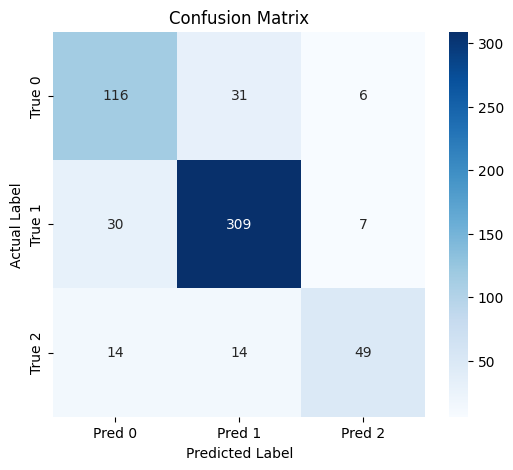

In [632]:
# Predict
y_pred_prob = lstm_model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(num_classes)],
            yticklabels=[f'True {i}' for i in range(num_classes)])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()